In [ ]:
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore")

In [ ]:
from ml_util import *
from rdkit_util import *

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('allFunctionals.csv','|')

In [6]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,B3LYP,B3LYP.1,B3LYP.2,PBE,PBE.1,PBE.2,PB86,PB87,PB88,M06,M07,M08
0,FileNumber,StandardSMILES,SMILES,InChI,literature,shortSMILES,NumberOfConformers,HOMOav,LUMOav,GAPav,HOMOav,LUMOav,GAPav,HOMOav,LUMOav,GAPav,HOMOav,LUMOav,GAPav
1,1,Cc1ccc(c2c3cc(c4ccc(c5sc(c6cccs6)c6cc(S(=O)(=O...,Cc1ccc(-c2c3cc(-c4ccc(-c5sc(-c6cccs6)c6cc(S(C)...,InChI=1S/C35H22O2S9/c1-17-6-8-23(40-17)29-19-1...,"10.1021/ar5000743,BOUZSMSNJFUUCG-UHFFFAOYSA-N,...",Cc1ccc(-c2c3cc(-c4ccc(-c5sc(-c6cccs6)c6cc(S(C)...,18,-0.186833,-0.0987778,0.0880556,-0.196389,-0.0985,0.0978889,-0.170778,-0.118333,0.0524444,-0.227389,-0.0765,0.150889
2,2,CN1c2ccccc2C(=C2c3ccc(c4cccs4)cc3N(C)C2=O)C1=O,CN1c2ccccc2C(=C2c3ccc(-c4cccs4)cc3N(C)C2=O)C1=O,InChI=1S/C22H16N2O2S/c1-23-16-7-4-3-6-14(16)19...,"10.1039/C3PY01598J,PAPOKCOIPOLVSC-BNEIJSFPSA-N...",CN1c2ccccc2C(=C2c3ccc(-c4cccs4)cc3N(C)C2=O)C1=O,8,-0.20325,-0.11325,0.09,-0.212375,-0.11225,0.100125,-0.183625,-0.13425,0.049375,-0.2455,-0.08925,0.15625
3,3,Cc1cc(c2cc3c4nsnc4c(c4cc(C)c(c5cccs5)s4)cc3c3n...,Cc1cc(-c2cc3c4nsnc4c(-c4cc(C)c(-c5cccs5)s4)cc3...,InChI=1S/C28H16N4S6/c1-13-9-21(35-27(13)19-5-3...,"10.1021/ja210687r,IKPPCQWOLGDYAQ-UHFFFAOYSA-N,...",Cc1cc(-c2cc3c4nsnc4c(-c4cc(C)c(-c5cccs5)s4)cc3...,18,-0.188611,-0.114778,0.0738333,-0.197611,-0.115,0.0826111,-0.173278,-0.132889,0.0403889,-0.228333,-0.0939444,0.134389
4,4,Cn1c2ccccc2c2ccc(c3ccc(c4ccc(C5=C(c6ccccc6)C(=...,Cn1c2ccccc2c2ccc(-c3ccc(-c4ccc(C5=C(c6ccccc6)C...,InChI=1S/C47H35NS4Si/c1-48-35-18-11-10-17-33(3...,"10.1021/ar900061z,LZAUYQACJPMHMN-UHFFFAOYSA-N,...",Cn1c2ccccc2c2ccc(-c3ccc(-c4ccc(C5=C(c6ccccc6)C...,15,-0.173267,-0.0910667,0.0822,-0.1822,-0.0902667,0.0919333,-0.158733,-0.111533,0.0472,-0.2134,-0.0679333,0.145467


In [19]:
compoundType, SMILES, experimentHOMO,experimentPCE = [],[],[],[]
all_SMILES = data['Unnamed: 1'][1:].tolist()
i = 0
for lit in data['Unnamed: 4'][1:]:
    compoundType += [lit.split(',',3)[2]]
    homo = float(lit.split(',',6)[5])/27.211
    if not np.isnan(homo):
        SMILES += [all_SMILES[i]]
        experimentHOMO += [homo]
        experimentPCE += [float(lit.split(',',10)[9])]
    i += 1

In [20]:
len(experimentHOMO), len(experimentPCE), len(SMILES)

(243, 243, 243)

In [21]:
saveData(SMILES, 'experiment_OPV_SMILES')
saveNumpy(experimentHOMO, 'experiment_OPV_HOMO')
saveNumpy(experimentPCE, 'experiment_OPV_PCE')

experiment_OPV_HOMO saved successfully in data
experiment_OPV_PCE saved successfully in data


In [22]:
exp_mols = []
for SMILE in SMILES:
    exp_mols += [MolFromSmiles(SMILE)]

In [24]:
saveNumpy(exp_mols, 'experiment_OPV_mols')

experiment_OPV_mols saved successfully in data


Text(0,0.5,'PCE')

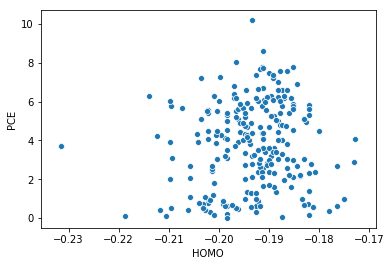

In [31]:
sns.scatterplot(experimentHOMO, experimentPCE)
plt.xlabel("HOMO")
plt.ylabel("PCE")

In [34]:
import time
experimental_maccs = []
start = time.time()
for i in range(len(exp_mols)):

    experimental_maccs += [np.array(getMACCS(exp_mols[i]))]

stop = time.time()
print("Generating 1 % took "+str(stop-start)+" seconds")

Generating 1 % took 1.2490711212158203 seconds


In [35]:
len(experimental_maccs)

243

In [36]:
saveNumpy(experimental_maccs,"experiment_OPV_maccs")

experiment_OPV_maccs saved successfully in data


In [ ]:
def extractMonomerHOMO_PCE(functional):
    data = open('HOPV_15.data').readlines()
    
    data_csv = pd.read_csv('allFunctionals.csv','|')
    datFileID = []
    for item in data_csv['Unnamed: 0'][1:]:
        datFileID += [int(item)]
    all_SMILES, SMILES = [], []
    lineNums = []
    for i in range(len(data)):
        if 'InChI' in data[i]:
            lineNums += [i-5]
            smiles_line_numer = i - 1
            
            all_SMILES += [data[i-1].rstrip()]
            
    endLineNums = []
    for lineNum in lineNums[1:]:
        endLineNums += [lineNum]

    endLineNums += [len(data)-1]

    count = 0
    DFT = []
    molecule = []
    for i in range(len(data)):
        if i == endLineNums[count]+1 or i ==len(data)-1:
            DFT += [molecule]
            count += 1
            molecule = []
        if functional in data[i]:#B3LYP/PBE/BP86/M06
            molecule += [float(data[i].split('DFT,')[1].split(',')[0])]
    
    count =0
    conformer_energy = []
    for i in range(350):
        if i == datFileID[count]-1:
            SMILES += [all_SMILES[i]]
            conformer_energy += [DFT[i]]
            count +=1
            
    return SMILES, conformer_energy
